In [6]:
## kerasテスト

import numpy as np
from matplotlib.pyplot as plt

# tensorflowからkeras読み込み
from tensorflow import keras
# mninstデータセット
from tensorflow.keras.datasets import mnist

(60000, 28, 28) <class 'numpy.ndarray'>
(60000,) <class 'numpy.ndarray'>


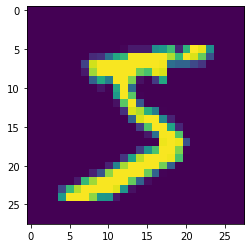

5


In [22]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

print(train_x.shape, type(train_x))
print(train_y.shape, type(train_y))


plt.imshow(train_x[0])
plt.show()
print(train_y[0])

In [32]:
# モデル作成 https://keras.io/ja/getting-started/sequential-model-guide/
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # 784 -> 128
    keras.layers.Dense(128, activation='relu'), # 128 -> 10
    keras.layers.Dense(10, activation='softmax'),
])

# compileで学習処理の設定
model.compile(
    # 最適化アルゴリズム
    optimizer='adam',
    # 損失関数
    loss='sparse_categorical_crossentropy',
    # 評価関数のリスト
    metrics=['accuracy'],
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [33]:
# addでもレイヤ追加できる
model2 = keras.Sequential()

model2.add(keras.layers.Flatten(input_shape=(28,28)))
model2.add(keras.layers.Dense(128, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model2.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [34]:
# fitで訓練
model.fit(train_x, train_y, epochs=10) # , batch_size=xx

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.0841 - accuracy: 0.8583
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3349 - accuracy: 0.9161
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2788 - accuracy: 0.9305
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2533 - accuracy: 0.9358
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2283 - accuracy: 0.9417
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2199 - accuracy: 0.9449
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2007 - accuracy: 0.9488
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1983 - accuracy: 0.9499
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1879 - accuracy: 0.9529
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.181

In [37]:
# predictで予測 verbose=1で進行状況表示
pred = model.predict(test_x, verbose=1)

313/313 [==============================] - 1s 2ms/step


In [39]:
# 評価
test_loss, test_acc = model.evaluate(test_x, test_y, verbose=1)
print('loss', test_loss)
print('acc', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.2601 - accuracy: 0.9473
loss 0.26011303067207336
acc 0.9473000168800354
